In [2]:
#import packages (but i forgot some so they're imported later :))
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import data here 

train_data = pd.read_csv('./train_noclean_prices.csv')
test_data = pd.read_csv('./test_noclean_prices.csv')

y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']

test_labels = test_labels.to_frame()

In [ ]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
#kfold of 10
kf = KFold(n_splits = 10, shuffle=True)

n_estimators = [100, 200, 300, 500, 800, 1000, 1500, 2000]
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
train2 = []
test2 = []
import time
start = time.time()
i=0
for var in n_estimators:
    train_accuracy_score = []
    test_accuracy_score = []
    for train, test in kf.split(X_train):
        i= i+1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]

        params = {'n_estimators': var, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False, 'n_jobs':-1}   
        clf = RandomForestClassifier()
        clf.set_params(**params)
        clf.fit(X_train_kf,y_train_kf)
        accuracy2 = clf.score(X_test_kf, y_test_kf)
        accuracy = clf.score(X_train_kf, y_train_kf)
        train_accuracy_score.append(accuracy)
        test_accuracy_score.append(accuracy2)
    #accuracy for each max_depth    
    test2.append(np.mean(test_accuracy_score))
    train2.append(np.mean(train_accuracy_score))
end = time.time()
print(end-start)
lw=2
#plot train and test CV error
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Test Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Train Accuracy')
plt.xlabel('N Estimators')
plt.ylabel('CV Accuracy')
plt.title('Random Forest Hyperparameter Training')
plt.show()


1
2
3
4
5
6
7
8
9
10
11
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


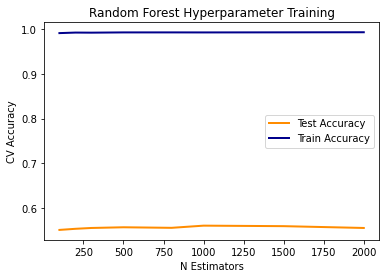

In [12]:
#plot train and test error 
lw=2
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Test Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Train Accuracy')
plt.xlabel('N Estimators')
plt.ylabel('CV Accuracy')
plt.title('Random Forest Hyperparameter Training')
plt.legend()

plt.show()



In [10]:
print(test2)

[0.5519052401299798, 0.5543852186372591, 0.5562440831051864, 0.5577933500498938, 0.5565527211319499, 0.5614118244078841, 0.5602726888928691, 0.5562455756552295]


1
2
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
473.5758900642395


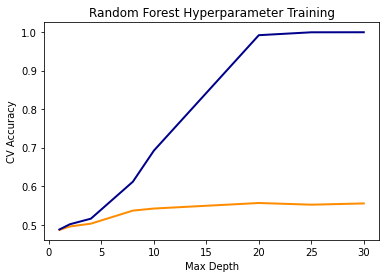

In [13]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits = 10, shuffle=True)

n_estimators = [1, 2, 4, 8, 10, 20, 25, 30]
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
train2 = []
test2 = []
import time
start = time.time()
i=0
for var in n_estimators:
    train_accuracy_score = []
    test_accuracy_score = []
    for train, test in kf.split(X_train):
        i= i+1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]

        params = {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': var, 'criterion': 'gini', 'bootstrap': False, 'n_jobs':-1}   
        clf = RandomForestClassifier()
        clf.set_params(**params)
        clf.fit(X_train_kf,y_train_kf)
        accuracy2 = clf.score(X_test_kf, y_test_kf)
        accuracy = clf.score(X_train_kf, y_train_kf)
        train_accuracy_score.append(accuracy)
        test_accuracy_score.append(accuracy2)
        
    test2.append(np.mean(test_accuracy_score))
    train2.append(np.mean(train_accuracy_score))
end = time.time()
print(end-start)
lw=2
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Test Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Train Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Random Forest Hyperparameter Training')
plt.show()


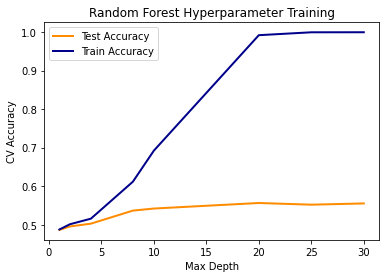

In [14]:
#added legend
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Test Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Train Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Random Forest Hyperparameter Training')
plt.legend()
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
603.5092632770538


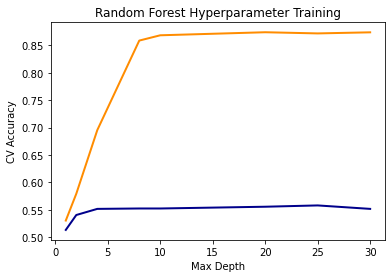

In [19]:
#calculate CV score for each max_depth 
import lightgbm as lgb
kf = KFold(n_splits = 10, shuffle=True)

n_estimators = [1, 2, 4, 8, 10, 20, 25, 30]
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
train2 = []
test2 = []
import time
start = time.time()
i=0
for var in n_estimators:
    train_accuracy_score = []
    test_accuracy_score = []
    for train, test in kf.split(X_train):
        i= i+1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]

        best_param = {'verbose':-1,'boosting_type':'gbdt',  'objective':'multiclass', 'num_class':5, 'metric':'multi_error','subsample_freq': 20, 'subsample': 0.8, 'reg_lambda': 0.8, 'reg_alpha': 0.5, 'num_leaves': 30, 'n_estimators': 1500, 'min_split_gain': 0.3, 'min_data_in_leaf': 15, 'max_depth': var, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
        d_train=lgb.Dataset(X_train_kf, y_train_kf)
        clf=lgb.train(best_param,d_train)
        y_pred1= clf.predict(X_train_kf)
        y_pred1 = [np.argmax(line) for line in y_pred1]
        y_pred2 = clf.predict(X_test_kf)
        y_pred2 = [np.argmax(line) for line in y_pred2]
        
        accuracy2 = accuracy_score(y_train_kf, y_pred1)
        accuracy = accuracy_score(y_test_kf, y_pred2)
        train_accuracy_score.append(accuracy)
        test_accuracy_score.append(accuracy2)
        
    test2.append(np.mean(test_accuracy_score))
    train2.append(np.mean(train_accuracy_score))
end = time.time()
print(end-start)
lw=2
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Test Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Train Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Random Forest Hyperparameter Training')
plt.show()


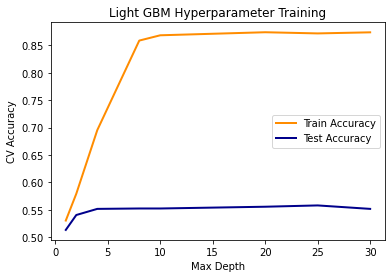

In [21]:
lw=2
plt.figure()
plt.plot(n_estimators, test2, color='darkorange',
             lw=lw, label='Train Accuracy')
plt.plot(n_estimators, train2, color='darkblue',
             lw=lw, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Light GBM Hyperparameter Training')
plt.legend()
plt.show()
